In [10]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [11]:
# Merge datasets on CustomerID
data = pd.merge(customers, transactions, on='CustomerID')

# Create features for clustering
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'TransactionID': 'count',  # Transaction count
    'Quantity': 'sum'  # Total quantity purchased
}).reset_index()

# Rename columns for clarity
customer_features.rename(columns={
    'TotalValue': 'TotalSpend',
    'TransactionID': 'TransactionCount',
    'Quantity': 'TotalQuantity'
}, inplace=True)

# Merge back with customer profile information
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID')

In [12]:
print(customer_features)

    CustomerID  TotalSpend  TransactionCount  TotalQuantity         Region
0        C0001     3354.52                 5             12  South America
1        C0002     1862.74                 4             10           Asia
2        C0003     2725.38                 4             14  South America
3        C0004     5354.88                 8             23  South America
4        C0005     2034.24                 3              7           Asia
..         ...         ...               ...            ...            ...
194      C0196     4982.88                 4             12         Europe
195      C0197     1928.65                 3              9         Europe
196      C0198      931.83                 2              3         Europe
197      C0199     1979.28                 4              9         Europe
198      C0200     4758.60                 5             16           Asia

[199 rows x 5 columns]


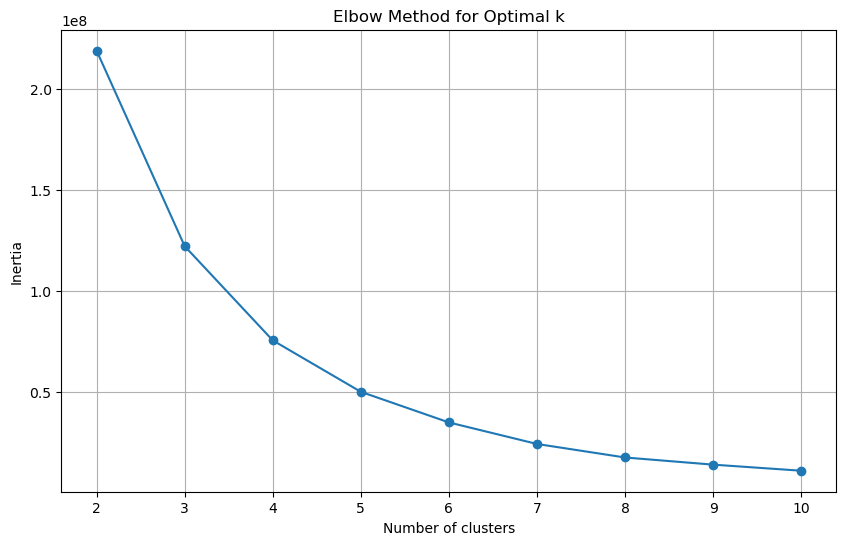

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = customer_features[['TotalSpend', 'TransactionCount', 'TotalQuantity']]

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [14]:
from sklearn.metrics import davies_bouldin_score

# Fit the K-Means model with the chosen number of clusters (e.g., 4)
optimal_k = 4  # Replace with the optimal number from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(features)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.5807800349517631


In [15]:
# Create a new DataFrame with only numerical features
numerical_features = customer_features.drop(['CustomerID','Region'],axis=1)
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(numerical_features, customer_features['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.53


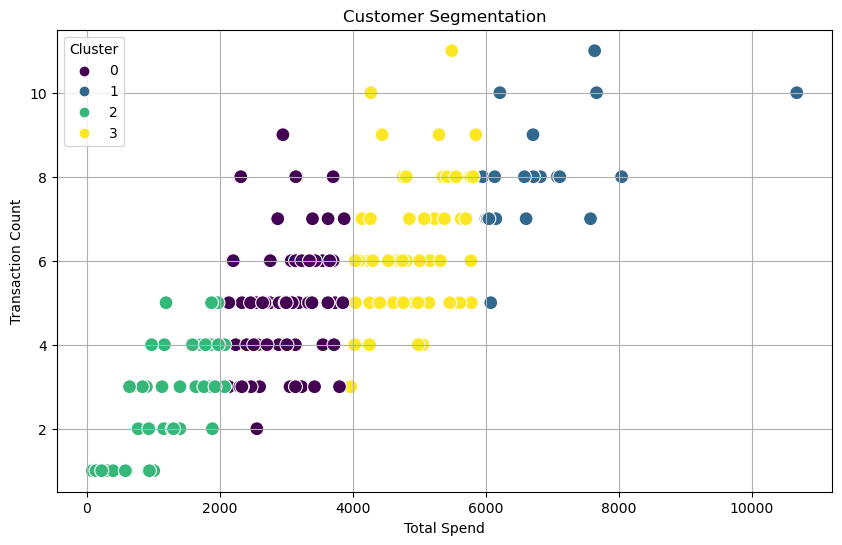

In [16]:
import seaborn as sns

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='TotalSpend', y='TransactionCount', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [17]:
pip install prettytable

In [ ]:
from prettytable import PrettyTable

# Example values for Silhouette Score and Davies-Bouldin Index
silhouette_score = 0.53
davies_bouldin_index = 0.5807800349517631

# Create a table
table = PrettyTable()

# Define columns
table.field_names = ["Metric", "Score"]

# Add rows
table.add_row(["Silhouette Score", silhouette_score])
table.add_row(["Davies-Bouldin Index", davies_bouldin_index])

# Print the table
print(table)
